In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("time_series_19-covid-Confirmed.csv")
df.loc[df['Country/Region']=='US'].head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20
33,"King County, WA",US,47.6062,-122.3321,1,1,1,1,1,1,...,9,14,21,31,51,58,71,83,83,116
34,"Cook County, IL",US,41.7377,-87.6976,0,0,1,1,1,1,...,3,4,4,4,5,5,6,7,7,11
40,"Los Angeles, CA",US,34.0522,-118.2437,0,0,0,0,1,1,...,1,1,1,7,11,13,14,14,14,20
56,"San Benito, CA",US,36.5761,-120.9876,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
59,"San Diego County, CA",US,32.7157,-117.1611,0,0,0,0,0,0,...,2,2,2,2,3,3,3,3,3,3


In [3]:
dates = list(df.columns)[4:len(df.columns)]
dat = {
    'US' : [],
    'WORLD' : [],
    'Date' : []
}

for d in dates:
    mon,day,yr = d.split('/')
    datetim = dt.datetime(2020, int(mon), int(day))
    dat['US'].append(sum(df.loc[df['Country/Region']=='US'][d]))
    dat['WORLD'].append(sum(df[d]))
    dat['Date'].append(datetim)

covid = pd.DataFrame.from_dict(dat)

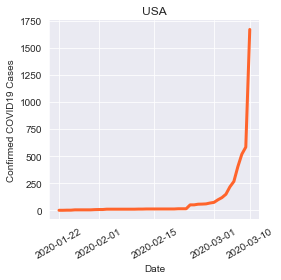

In [17]:
sns.set_style("darkgrid")

xtix = [dt.datetime(2020, 1, 22),
        dt.datetime(2020, 2, 1),dt.datetime(2020, 2, 15),
        dt.datetime(2020, 3, 1),dt.datetime(2020,3,10)]
xtix = [x.date() for x in xtix]


f, ax = plt.subplots(1,1,figsize=(4,4))
sns.lineplot(
    x='Date',
    y='US',
    data=covid,
    ax=ax,
    linewidth=3,
    color='#ff642c'
)

ax.set_ylabel("Confirmed COVID19 Cases")
ax.set_xticks(xtix,)
ax.set_xticklabels(xtix,rotation=30)
sns.despine(ax=ax)
ax.set_title("USA")
f.tight_layout()
f.savefig("usa_covid.png",dpi=150)

In [ ]:
sns.set_style("darkgrid")

xtix = [dt.datetime(2020, 1, 22),
        dt.datetime(2020, 2, 1),dt.datetime(2020, 2, 15),
        dt.datetime(2020, 3, 1),dt.datetime(2020,3,10)]
xtix = [x.date() for x in xtix]


f, ax = plt.subplots(1,1,figsize=(4,4))
sns.lineplot(
    x='Date',
    y='US',
    data=covid,
    ax=ax,
    linewidth=3,
    color='#ff642c'
)

ax.set_ylabel("Confirmed COVID19 Cases")
ax.set_xticks(xtix,)
ax.set_xticklabels(xtix,rotation=30)
sns.despine(ax=ax)
ax.set_title("World")
f.tight_layout()
f.savefig("world_covid.png",dpi=150)